In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [100]:
df=pd.read_csv('rating_short.csv')

In [101]:
df.head()

,userid,productid,rating,date
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,1199750400
1,ALDXDYEGKB27G,B002L6HE9G,4.0,1331337600
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0,1358640000
3,A23LX12CA3G4FG,B008HOEDYU,1.0,1385337600
4,A3TV7QFYXAG130,B0069R7TAM,5.0,1402963200


In [102]:
if 'date' in df.columns:
  df = df.drop('date', axis=1)

In [103]:
df.head()

,userid,productid,rating
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0
1,ALDXDYEGKB27G,B002L6HE9G,4.0
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0
3,A23LX12CA3G4FG,B008HOEDYU,1.0
4,A3TV7QFYXAG130,B0069R7TAM,5.0


In [104]:
df.shape

(78245, 3)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78245 entries, 0 to 78244
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userid     78245 non-null  object 
 1   productid  78245 non-null  object 
 2   rating     78245 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.8+ MB


In [106]:
df.describe()

,rating
count,78245.000000
mean,4.006454
std,1.385342
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [107]:
df.isnull().sum()

,0
userid,0
productid,0
rating,0


In [108]:
df.duplicated().sum()

np.int64(0)

In [109]:
users=df['userid'].nunique()
product=df['productid'].nunique()
rating=df['rating'].nunique()

print('users:',users)
print('products:',product)
print('rating:',rating)

users: 76430
products: 40228
rating: 5


In [110]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [111]:
df.head()

,userid,productid,rating
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0
1,ALDXDYEGKB27G,B002L6HE9G,4.0
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0
3,A23LX12CA3G4FG,B008HOEDYU,1.0
4,A3TV7QFYXAG130,B0069R7TAM,5.0


In [112]:
prod_popularity = df['productid'].value_counts()
top_products = prod_popularity.sort_values(ascending=False)
top_products.head(10)

,count
productid,
B0074BW614,201
B00DR0PDNE,179
B007WTAJTO,147
B006GWO5WK,126
B003ELYQGG,126
B0019EHU8G,123
B00622AG6S,113
B008OHNZI0,112
B007R5YDYA,108


In [113]:
avg_rating = df.groupby('productid')['rating'].mean().sort_values(ascending=False)
avg_rating.head(10)

,rating
productid,
B00L1LXOWS,5.0
0594481813,5.0
B00KKKOAAG,5.0
B00KIVGGBS,5.0
B00KINSDK8,5.0
B00KIMX4EY,5.0
B00KHR4ZL6,5.0
B00KH2T8XG,5.0
B00KGLC3ZS,5.0


In [114]:
df.info()
df.describe()

print("Unique Users:", df['userid'].nunique())
print("Unique Items:", df['productid'].nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78245 entries, 0 to 78244
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userid     78245 non-null  object 
 1   productid  78245 non-null  object 
 2   rating     78245 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.8+ MB
Unique Users: 76430
Unique Items: 40228


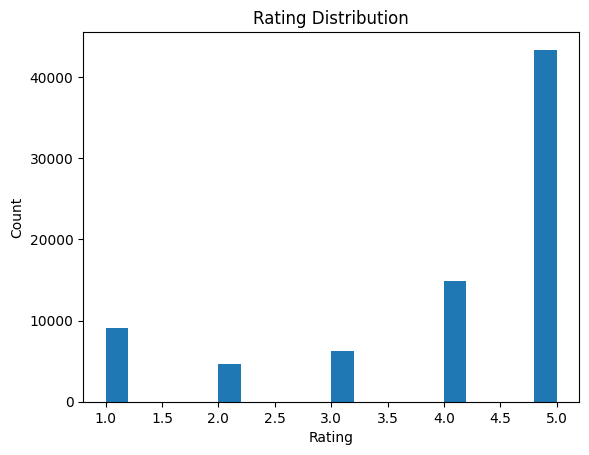

In [115]:
#rating distribution
plt.hist(df['rating'], bins=20)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution")
plt.show()


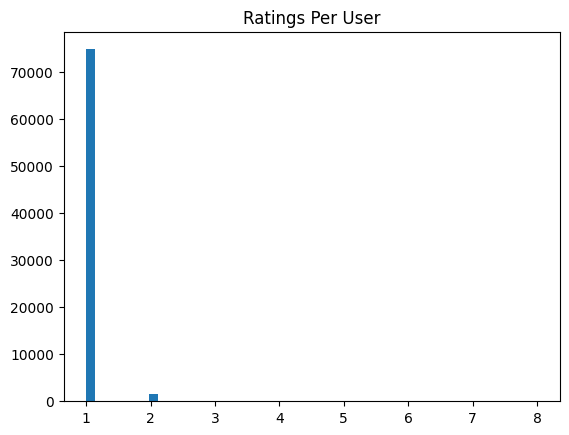

In [116]:
#ratings per user
user_activity = df.groupby("userid").size()
plt.hist(user_activity, bins=50)
plt.title("Ratings Per User")
plt.show()


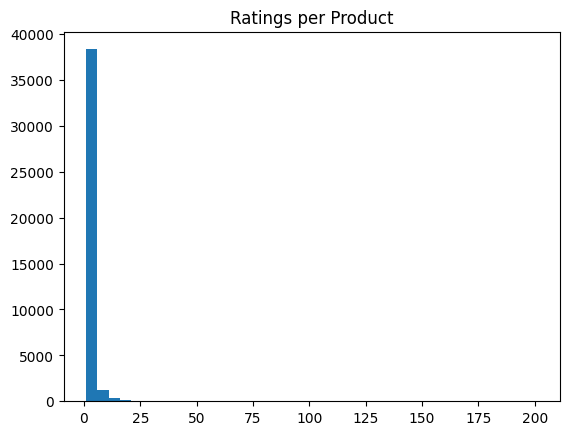

In [117]:
#rating per product
item_pop = df.groupby("productid").size()
plt.hist(item_pop, bins=40)
plt.title("Ratings per Product")
plt.show()


In [118]:
total_possible = users * product
actual_data = len(df)

sparsity = 1 - (actual_data / total_possible)

print('sparsity:',sparsity)

sparsity: 0.999974551376661


In [119]:
#encode for matrix building
user_index = df['userid'].astype("category").cat.codes
prod_index = df['productid'].astype("category").cat.codes

df['user_idx'] = user_index
df['prod_idx'] = prod_index




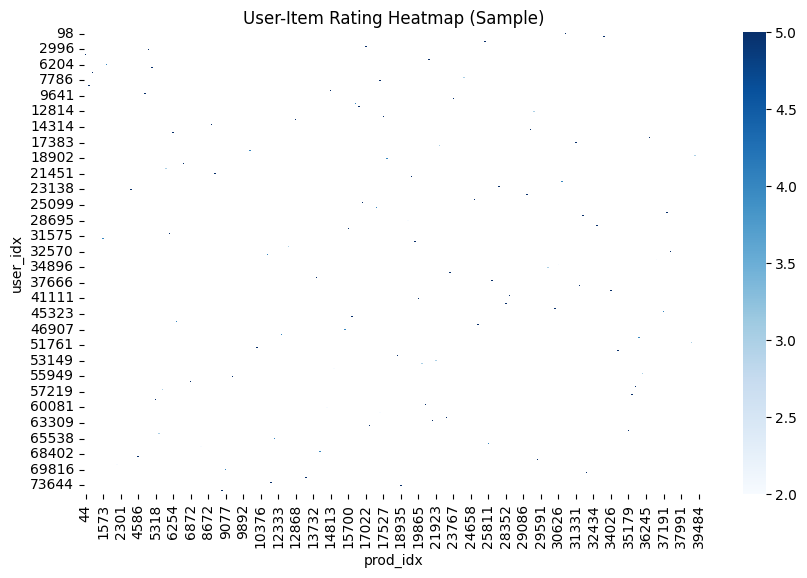

In [120]:
# Select small subset

df_sorted = df.sort_values('rating', ascending=False)

df_top_rating = df_sorted[df_sorted['rating'] >= 2]

top_users = df['user_idx'].unique()[:200]
top_products = df['prod_idx'].unique()[:200]

df_small = df[(df['user_idx'].isin(top_users)) &
              (df['prod_idx'].isin(top_products))]

df_small = df_top_rating[
    (df_top_rating['user_idx'].isin(top_users)) &
    (df_top_rating['prod_idx'].isin(top_products))
]

pivot_matrix = df_small.pivot(index='user_idx',columns='prod_idx',values='rating')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_matrix, cmap='Blues', linewidths=0.1)
plt.title("User-Item Rating Heatmap (Sample)")
plt.show()


In [121]:
#decoding index
user_reverse = dict(enumerate(df['userid'].astype('category').cat.categories))
prod_reverse = dict(enumerate(df['productid'].astype('category').cat.categories))


In [122]:
df.head()

,userid,productid,rating,user_idx,prod_idx
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,19800,6501
1,ALDXDYEGKB27G,B002L6HE9G,4.0,68377,14346
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0,3273,29591
3,A23LX12CA3G4FG,B008HOEDYU,1.0,22312,31598
4,A3TV7QFYXAG130,B0069R7TAM,5.0,57219,27361


In [123]:
#MODEL BUILDING

In [124]:
#build sparse matrix
from scipy.sparse import csr_matrix


R = csr_matrix((df['rating'], (df['user_idx'], df['prod_idx'])))

R


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 78245 stored elements and shape (76430, 40228)>

In [125]:
#user similarity
from sklearn.metrics.pairwise import cosine_similarity

# Keep R as sparse
user_sim = cosine_similarity(R, dense_output=False)  # returns sparse-friendly output


In [126]:
print("R shape:", R.shape)


R shape: (76430, 40228)


In [127]:
print(user_sim[:5,:5].toarray())

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [128]:
user_sim = user_sim.setdiag(0)


In [129]:
df.head()

,userid,productid,rating,user_idx,prod_idx
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,19800,6501
1,ALDXDYEGKB27G,B002L6HE9G,4.0,68377,14346
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0,3273,29591
3,A23LX12CA3G4FG,B008HOEDYU,1.0,22312,31598
4,A3TV7QFYXAG130,B0069R7TAM,5.0,57219,27361


In [130]:
from sklearn.decomposition import TruncatedSVD

# Build SVD model for dimensionality reduction
svd = TruncatedSVD(n_components=50, random_state=42)

user_matrix = svd.fit_transform(R)   # user-factor matrix
prod_matrix = svd.components_.T      # prod-factor matrix

def svd_scores(user_idx):
    return user_matrix[user_idx].dot(prod_matrix.T)

svd_scores(user_idx=123)

array([ 3.22654447e-17,  3.40978788e-12,  5.74673719e-17, ...,
        3.11949613e-17,  1.36967708e-25, -3.68989623e-22])

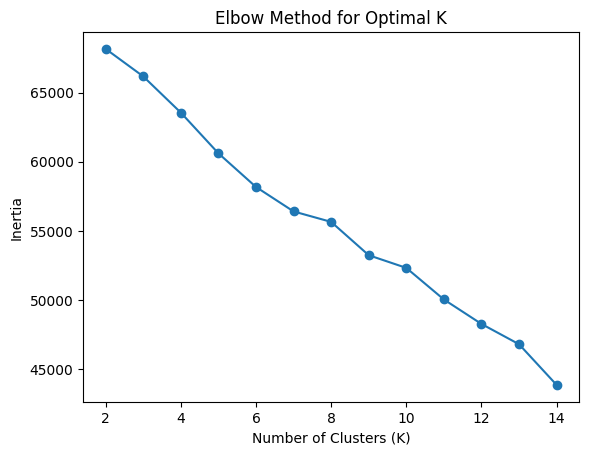

In [131]:
# Elbow method used for identiies no.of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_matrix)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [132]:
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(user_matrix)
    score = silhouette_score(user_matrix, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")


K=2, Silhouette Score=0.922
K=3, Silhouette Score=0.922
K=4, Silhouette Score=0.924
K=5, Silhouette Score=0.925
K=6, Silhouette Score=0.927
K=7, Silhouette Score=0.929


In [133]:
clf = KMeans(n_clusters=5, random_state=42)
clf.fit(user_matrix)
cluster_names = clf.labels_

In [134]:
md = pd.DataFrame(cluster_names)
df['cluster'] = md[0]
df.head(200)

,userid,productid,rating,user_idx,prod_idx,cluster
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,19800,6501,0.0
1,ALDXDYEGKB27G,B002L6HE9G,4.0,68377,14346,0.0
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0,3273,29591,0.0
3,A23LX12CA3G4FG,B008HOEDYU,1.0,22312,31598,0.0
4,A3TV7QFYXAG130,B0069R7TAM,5.0,57219,27361,0.0
...,...,...,...,...,...,...
195,A2ZQEZVBRNY2J3,B00E3VM78U,5.0,40310,37989,0.0
196,A25DWXWPJWDCN5,B00EE6089O,3.0,23335,38180,0.0
197,A1CEIO7D51NQGE,B00519RW1U,3.0,7174,23996,0.0
198,ABQKSCG2GPPV7,B005JE3VYY,1.0,62890,25824,0.0


In [135]:
k = 5   # choose from elbow
kmeans = KMeans(n_clusters=k, random_state=42)

user_clusters = kmeans.fit_predict(user_matrix)
item_clusters = kmeans.fit_predict(prod_matrix)

print(len(user_clusters), "==", R.shape[0])  # MUST match


76430 == 76430


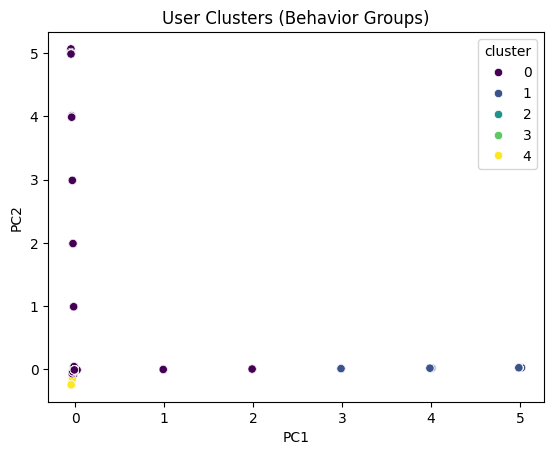

In [136]:
import seaborn as sns
import pandas as pd

pca = PCA(n_components=2, random_state=42)
user_2d = pca.fit_transform(user_matrix)
user_df = pd.DataFrame(user_2d, columns=["PC1", "PC2"])
user_df["cluster"] = user_clusters

sns.scatterplot(
    data=user_df,
    x="PC1",
    y="PC2",
    hue="cluster",
    palette="viridis"
)
plt.title("User Clusters (Behavior Groups)")
plt.show()


| Cluster | Behavior Meaning (Data-Driven)               |
| ------- | -------------------------------------------- |
| 0       | High-activity users (power users)            |
| 1       | Selective users (rate conservatively)        |
| 2       | Niche-interest users (focused on few items)  |
| 3       | Low-activity / casual users                  |
| 4       | Moderate activity users with mixed interests |


“User clusters represent groups of users with similar interaction behavior, learned from latent features using SVD and grouped using KMeans. PCA is applied only to visualize these behavior groups in 2D.”

🔹 Why this is useful in recommendation systems

Improve recommendation accuracy

Handle cold-start users

Personalize content

Target marketing campaigns

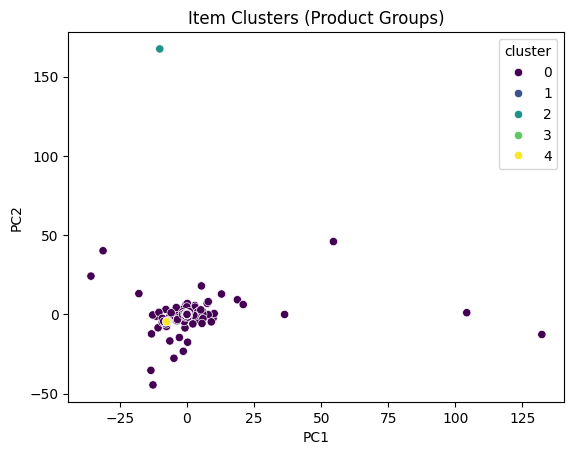

In [137]:
scaler = StandardScaler()
prod_scaled = scaler.fit_transform(prod_matrix)
item_2d = PCA(n_components=2, random_state=42).fit_transform(prod_scaled)
item_df = pd.DataFrame(item_2d, columns=["PC1", "PC2"])
item_df["cluster"] = item_clusters

sns.scatterplot(
    data=item_df,
    x="PC1",
    y="PC2",
    hue="cluster",
    palette="viridis"
)
plt.title("Item Clusters (Product Groups)")
plt.show()


| Cluster | Data-driven Meaning                         |
| ------- | ------------------------------------------- |
| 0       | Popular items rated by many users           |
| 1       | High-rated but less-frequent items          |
| 2       | Low-engagement items                        |
| 3       | Items liked by a specific user group        |
| 4       | Niche or newly added items with few ratings |



“Item clusters represent groups of products with similar interaction patterns, learned from latent factors and grouped using KMeans. PCA is used to visualize these product groups in two dimensions.”

🔹 Why item clusters are useful

“Similar items” recommendations

Product substitution

Bundling & cross-selling

Inventory planning

Cold-start item handling

In [138]:
#user to user similarity
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def get_user_similarity(user_idx):
    user_row = R[user_idx]
    sim_scores = cosine_similarity(user_row, R).flatten()
    return sim_scores

def print_similar_users(user_idx, top_n=5):
    sim_scores = get_user_similarity(user_idx)

    # Don't compare user with itself
    sim_scores[user_idx] = -1

    # Top N similar user_idx
    top_idx = np.argsort(sim_scores)[-top_n:][::-1]

    print("Top similar users:")
    for idx in top_idx:
        real_id = user_reverse[idx]
        print(f"User_idx: {idx}, User_ID: {real_id}, similarity: {sim_scores[idx]}")

print_similar_users(user_idx=123, top_n=3)


Top similar users:
User_idx: 76202, User_ID: AZLSVWC335FCC, similarity: 1.0
User_idx: 28946, User_ID: A2FATI4ZD80MX1, similarity: 1.0
User_idx: 25469, User_ID: A295AUT0M2JA8R, similarity: 0.0


In [139]:
# product to product similarity

def get_product_similarity(prod_idx):
    product_row = R.T[prod_idx]
    return cosine_similarity(product_row, R.T).flatten()


def print_similar_products(prod_idx, top_n=5, min_sim=0.01, min_ratings=3):

    sim_scores = get_product_similarity(prod_idx)
    sim_scores[prod_idx] = -1  # ignore self

    sorted_idx = np.argsort(sim_scores)[::-1]
    rating_counts = np.array(R.getnnz(axis=0))

    results = []
    used_idx = set()

    # PRIMARY PASS: strong & valid similarities
    for idx in sorted_idx:
        if idx not in prod_reverse:
            continue
        if sim_scores[idx] < min_sim:
            continue
        if rating_counts[idx] < min_ratings:
            continue

        results.append((idx, sim_scores[idx]))
        used_idx.add(idx)

        if len(results) == top_n:
            break

    # FALLBACK: relax similarity but still avoid junk
    if len(results) < top_n:
        for idx in sorted_idx:
            if idx in used_idx:
                continue
            if idx not in prod_reverse:
                continue
            if idx == prod_idx:
                continue
            if rating_counts[idx] < min_ratings:
                continue

            results.append((idx, sim_scores[idx]))
            used_idx.add(idx)

            if len(results) == top_n:
                break

    print(f"\nProducts similar to {prod_reverse[prod_idx]}\n")
    for idx, score in results:
        print(
            f"Prod_idx: {idx}, "
            f"Product_ID: {prod_reverse[idx]}, "
            f"Similarity: {score:.4f}"
        )

print_similar_products(prod_idx=123)


Products similar to B00000K135

Prod_idx: 21, Product_ID: 9573212919, Similarity: 0.0000
Prod_idx: 23, Product_ID: 9575871979, Similarity: 0.0000
Prod_idx: 40124, Product_ID: B00JLADOGW, Similarity: 0.0000
Prod_idx: 40125, Product_ID: B00JM59JPG, Similarity: 0.0000
Prod_idx: 40099, Product_ID: B00JDAIMQ2, Similarity: 0.0000


In [140]:
# Recommendation function

def recommend_products_sparse(user_idx, top_n=5):
    # compute similarity only for this user
    sim_scores = get_user_similarity(user_idx)

    # weighted sum of ratings
    weighted_ratings = sim_scores.dot(R.toarray())
    normalization = sim_scores.sum()
    preds = weighted_ratings / (normalization + 1e-9)  # avoid divide by zero

    # items already rated by user
    rated = df[df['user_idx'] == user_idx]['prod_idx'].tolist()

    # recommend top items not already rated
    recs = [(i, preds[i]) for i in range(len(preds)) if i not in rated]
    recs = sorted(recs, key=lambda x: x[1], reverse=True)[:top_n]

    return recs


In [141]:
df['user_idx'].min(), df['user_idx'].max()


(0, 76429)

In [142]:
user_idx_input = int(input("Enter User_idx between 0 to 76429: "))

if user_idx_input not in df['user_idx'].values:
    print("Invalid user_idx")
else:
    real_user_id = user_reverse[user_idx_input]
    print("Real User ID:", real_user_id)

    recs = recommend_products_sparse(user_idx_input, top_n=5)

    print("\nRecommended products:")
    for prod_id, score in recs:
        real_prod_id = prod_reverse[prod_id]
        print(f"Productid {real_prod_id} → Predicted Rating {score:.2f}")


Enter User_idx between 0 to 76429: 1234
Real User ID: A11Y2N85ND5GFY

Recommended products:
Productid 0594481813 → Predicted Rating 0.00
Productid 0972683275 → Predicted Rating 0.00
Productid 0983947600 → Predicted Rating 0.00
Productid 1400501466 → Predicted Rating 0.00
Productid 1400501776 → Predicted Rating 0.00


In [143]:
#DEPLOYMENT

In [144]:
!pip install streamlit

In [145]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity


# Load Data

@st.cache_data
def load_data():
    df = pd.read_csv("rating_short.csv")

    df['user_idx'] = df['userid'].astype('category').cat.codes
    df['prod_idx'] = df['productid'].astype('category').cat.codes

    user_map = dict(enumerate(df['userid'].astype('category').cat.categories))
    prod_map = dict(enumerate(df['productid'].astype('category').cat.categories))

    R = csr_matrix((df['rating'], (df['user_idx'], df['prod_idx'])))

    return df, R, user_map, prod_map

df, R, user_map, prod_map = load_data()

st.title("🛒 Recommendation System with Clustering")


# SVD (Latent Features) — NO CACHE

svd = TruncatedSVD(n_components=30, random_state=42)
user_matrix = svd.fit_transform(R)
item_matrix = svd.components_.T


# USER CLUSTERING

user_kmeans = KMeans(n_clusters=5, random_state=42)
user_clusters = user_kmeans.fit_predict(user_matrix)


# PRODUCT CLUSTERING

scaler = StandardScaler()
item_scaled = scaler.fit_transform(item_matrix)

item_kmeans = KMeans(n_clusters=5, random_state=42)
item_clusters = item_kmeans.fit_predict(item_scaled)


# USER CLUSTER VISUALIZATION

st.header("👥 User Clusters (Behavior Groups)")

# Clustered products
clustered_products = []
for c in np.unique(item_clusters):
    clustered_products.extend(np.where(item_clusters == c)[0])

pca_user = PCA(n_components=2, random_state=42)
user_2d = pca_user.fit_transform(user_matrix)

fig1, ax1 = plt.subplots(figsize=(7,5))
for cluster_id in np.unique(user_clusters):
    idx = np.where(user_clusters == cluster_id)
    ax1.scatter(user_2d[idx, 0], user_2d[idx, 1], label=f"Cluster {cluster_id}", alpha=0.7)
ax1.set_title("User Clusters")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.legend()
st.pyplot(fig1)


# PRODUCT CLUSTER VISUALIZATION

st.header("📦 Item Clusters (Product Groups)")

pca_item = PCA(n_components=2, random_state=42)
item_2d = pca_item.fit_transform(item_matrix)

fig2, ax2 = plt.subplots(figsize=(7,5))
for cluster_id in np.unique(item_clusters):
    idx = np.where(item_clusters == cluster_id)
    ax2.scatter(item_2d[idx, 0], item_2d[idx, 1], label=f"Cluster {cluster_id}", alpha=0.7)
ax2.set_title("Item Clusters")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.legend()
st.pyplot(fig2)

# PRODUCT-TO-PRODUCT RECOMMENDATION

st.header("🔁 Product-to-Product Recommendation")

product_idx = st.selectbox(
    "Select a Product",
    options=clustered_products,
    format_func=lambda x: f"[Cluster {item_clusters[x]}] {prod_map[x]}"
)

top_n = st.slider("Number of Recommendations", 1, 10, 5)

def recommend_similar_products(prod_idx, top_n=5):
    cluster_id = item_clusters[prod_idx]

    # Items in the same cluster
    same_cluster_items = np.where(item_clusters == cluster_id)[0]

    target_vec = item_matrix[prod_idx].reshape(1, -1)

    if len(same_cluster_items) > 1:
        # Recommend from the same cluster
        similarities = cosine_similarity(target_vec, item_matrix[same_cluster_items])[0]
        ranked = sorted(
            zip(same_cluster_items, similarities),
            key=lambda x: x[1],
            reverse=True
        )
        ranked = [(i, s) for i, s in ranked if i != prod_idx][:top_n]
    else:
        # No other items in the cluster: recommend globally
        similarities = cosine_similarity(target_vec, item_matrix)[0]
        ranked = sorted(
            enumerate(similarities),
            key=lambda x: x[1],
            reverse=True
        )
        ranked = [(i, s) for i, s in ranked if i != prod_idx][:top_n]

    return ranked, cluster_id


if st.button("Recommend Similar Products"):
    recs, cluster_id = recommend_similar_products(product_idx, top_n)

    st.subheader(f"Product Group: Cluster {cluster_id}")

    rec_df = pd.DataFrame(
        [(prod_map[i], score) for i, score in recs],
        columns=["Recommended Product", "Similarity Score"]
    )

    st.dataframe(rec_df)


2025-12-21 13:32:59.769 No runtime found, using MemoryCacheStorageManager
2025-12-21 13:32:59.848 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 13:32:59.849 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 13:32:59.851 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 13:33:01.395 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 13:33:01.396 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 13:33:01.397 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 13:33:01.504 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-21 13:33:02.917 Thread 'MainThread':